In [ ]:
import cv2
import dlib
import math
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab.patches import cv2_imshow
# read the image
img_name="/aaaa.jpg"
img = cv2.imread(img_name)
cv2_imshow(img)

img_copy = img.copy()
pixels = np.array(img)
img_height , img_width , channels = pixels.shape


print("Image Height: ", img_height)

print("Image Width: ", img_width)


In [ ]:
#Class For Face
orig = img.copy()
class Face:
  def __init__(self, face , landmarks):
    self.face = face
    self.landmarks = landmarks

  def setAttributes(self):
    self.nose = (self.landmarks.part(33).x , self.landmarks.part(33).y)  
    self.chin = (self.landmarks.part(8).x , self.landmarks.part(8).y)

    #Lips
    self.lip = (self.landmarks.part(66).x , self.landmarks.part(66).y)
    self.lipTopCorner = (self.landmarks.part(51).x , self.landmarks.part(51).y)
    self.lipBottomCorner = (self.landmarks.part(57).x , self.landmarks.part(57).y)

    #Nose
    self.noseRightCorner = (self.landmarks.part(35).x , self.landmarks.part(35).y)
    self.noseLeftCorner = (self.landmarks.part(31).x , self.landmarks.part(31).y)
    self.noseTip = (self.landmarks.part(33).x , self.landmarks.part(33).y)
    #Eyes
    self.eyeLeftCorner = (self.landmarks.part(36).x , self.landmarks.part(36).y)
    self.eyeRightCorner = (self.landmarks.part(45).x , self.landmarks.part(45).y)
    self.pupil = self.midPoint(self.landmarks.part(39) , self.landmarks.part(36) )



  def midPoint(self , A , B):
    mp = ((A.x + B.x) * 0.5 , (A.y + B.y) * 0.5)
    return mp
  
  #Calculating Distance Between 2 Points in Pixels
  def getDist(self , point1 , point2):
    result = math.sqrt(math.pow( (point1[0] - point2[0]) , 2 ) + math.pow( (point1[1] - point2[1]) , 2 ))
    return result


  def calculateBeauty(self):
    #c
    LengthofPupilToNoseTip = self.getDist(self.pupil , self.noseTip )
    #e
    LengthofNose = self.getDist(self.noseLeftCorner , self.noseRightCorner)
    #i
    LengthofNoseTipAndChin = self.getDist(self.noseTip , self.chin)
    #j
    LengthofLipsAndChin = self.getDist(self.lip , self.chin)
    #k
    LengthofLips = self.getDist(self.lipTopCorner , self.lipBottomCorner)
    #l
    LengthofNoseToLips = self.getDist(self.noseTip , self.lip)
    
    
    
    #i/j
    Ratio_IJ = (LengthofNoseTipAndChin + LengthofLipsAndChin)/LengthofNoseTipAndChin
    print(Ratio_IJ)

    #i/c
    Ratio_IC = (LengthofNoseTipAndChin + LengthofPupilToNoseTip)/LengthofNoseTipAndChin
    print(Ratio_IC)

    #e/l
    Ratio_EL = (LengthofNose + LengthofNoseToLips)/LengthofNose
    print(Ratio_EL)

    #k/e
    Ratio_KE = (LengthofLips + LengthofNose)/LengthofLips
    print(Ratio_KE)


    #Now Average These Ratios

    Avg_Golden_Ratio = (Ratio_IJ + Ratio_IC + Ratio_EL + Ratio_KE) / 4
    print("Avg_Golden_Ratio : " , Avg_Golden_Ratio)

    if Avg_Golden_Ratio>1.6:
      difference=Avg_Golden_Ratio-1.6
      Avg_Golden_Ratio=1.6-difference
    Beauty = Avg_Golden_Ratio*100/1.6
    return Beauty
    






In [ ]:
# Load the detector
detector = dlib.get_frontal_face_detector()
def midPoint(self , A , B):
    return ((A.x + B.x) * 0.5, (A.y + B.y) * 0.5)
  
# read the image
img = cv2.imread(img_name)
orig = img.copy()
# Convert image into grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
# Use detector to find landmarks
faces = detector(gray)

for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    sumX = x1 
    sumY = y2 + 25
    # Draw a rectangle
    cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)
    cv2.putText(img, "Text Here",(int(sumX), int(sumY )), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)

# show the image
cv2_imshow(img)

In [ ]:
#download shape_predictor_68_face_landmarks.dat
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bunzip2 "shape_predictor_68_face_landmarks.dat.bz2"

--2021-09-16 16:09:10--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  19%[==>                 ]  11.80M   160KB/s    in 5m 22s  

2021-09-16 16:14:33 (37.5 KB/s) - Connection closed at byte 12369943. Retrying.

--2021-09-16 16:14:34--  (try: 2)  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 206 Partial Content
Length: 64040097 (61M), 51670154 (49M) remaining
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_  49%[+++=====>           ]  30.01M  --.-KB/s    in 16m 30s 

2021-09-16 16:31:05 (18.9 KB/s) - Read error at byte 31473024/64040097 (Connection timed out). Retr

1


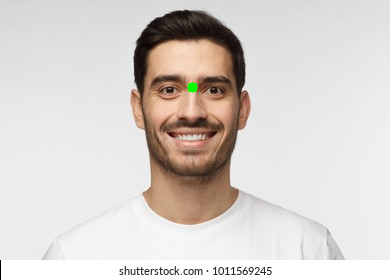

In [ ]:
# Load the detector
detector = dlib.get_frontal_face_detector()
# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# read the image
img = cv2.imread(img_name)
# Convert image into grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
# Use detector to find landmarks
faces = detector(gray)
facesList = []
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    # Look for the landmarks
    landmarks = predictor(image=gray, box=face)
    x = landmarks.part(27).x
    y = landmarks.part(27).y
    # Draw a circle
    cv2.circle(img=img, center=(x, y), radius=5, color=(0, 255, 0), thickness=-1)
    f = Face(face , landmarks)
    facesList.append(f)

print(len(facesList))
# show the image
cv2_imshow(img)

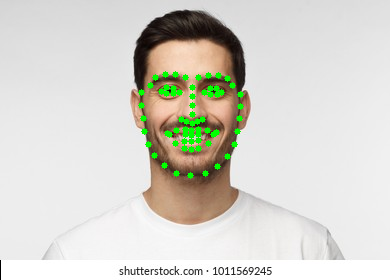

In [ ]:
# Load the detector
detector = dlib.get_frontal_face_detector()
# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
# read the image
img = cv2.imread(img_name)
# Convert image into grayscale
gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)
# Use detector to find landmarks
faces = detector(gray)
for face in faces:
    x1 = face.left() # left point
    y1 = face.top() # top point
    x2 = face.right() # right point
    y2 = face.bottom() # bottom point
    # Create landmark object
    landmarks = predictor(image=gray, box=face)
    # Loop through all the points
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        # Draw a circle
        cv2.circle(img=img, center=(x, y), radius=3, color=(0, 255, 0), thickness=-1)
# show the image
cv2_imshow(img)

In [ ]:
print("Image Height: ", img_height)
print("Image Width: ", img_width)
lanpop = ((landmarks.part(39).x + landmarks.part(36).x) * 0.5 , (landmarks.part(39).y + landmarks.part(36).y) * 0.5 )
print(lanpop)
print(landmarks.part(36))
print(landmarks.part(39))
print(landmarks.part(16).x)
print(landmarks.part(16).y)

Image Height:  280
Image Width:  390
(170.0, 91.5)
(161, 91)
(179, 92)
240
94


1.6536456111177755
1.7383386876801585
1.858464589396188
2.1052631578947367
Avg_Golden_Ratio :  1.8389280115222144


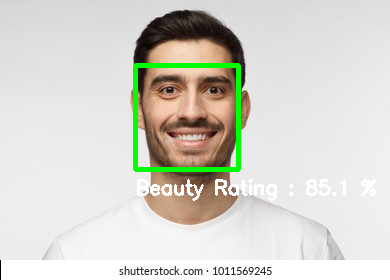

In [ ]:

for getface in facesList:
  f = getface.face
  getface.setAttributes()
  getBeauty = getface.calculateBeauty()
  x1 = f.left() # left point
  y1 = f.top() # top point
  x2 = f.right() # right point
  y2 = f.bottom() # bottom point
  rectXMid = x1
  rectYOffset = y2 + 25
  # Draw a rectangle
  cv2.rectangle(img=img_copy, pt1=(x1, y1), pt2=(x2, y2), color=(0, 255, 0), thickness=4)
  cv2.putText(img_copy, "Beauty Rating : {:.1f} %".format(getBeauty),(int(rectXMid), int(rectYOffset)), cv2.FONT_HERSHEY_SIMPLEX,0.65, (255, 255, 255), 2)
  
cv2_imshow(img_copy)